# Pruebas para el filtrado de imágenes
Se requieren estas pruebas con el objetivo de eliminar huecos en las capas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import cv2 as cv
import sys
sys.path.append('../')
from extractBofs import *
from PCD_Image_Processor import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# Variables iniciales
floor_plane=(0,1,0.11,0.57)
file = "../Proyecto_AYUDAME_Datasets/TUM_RGBD_Dataset/rgbd_dataset_freiburg2_pioneer_slam2/pcd/1311877889.705060.ply"
axis=2; method=2; layers=4

#Primero extraemos los datos crudos
pcd = o3d.io.read_point_cloud(file)
data = np.asarray(pcd.points)

# Si se envió un plano del piso
if floor_plane:
    A, B, C, D = floor_plane
    # Ecuación del plano con "y" despejada
    y_plane = -A/B * data[:,0] - C/B * data[:,2] - D/B
    above_floor = data[:,1] > y_plane
    data = data[above_floor]


In [4]:
capas=cortaCapas(data,nCapasOintervalo=layers,metodo=method,eje=axis)

In [55]:
pcd = np.asarray(capas[2])
img = PCD_Image_Processor.pcd_2_image(pcd=pcd,pixels_height=150)

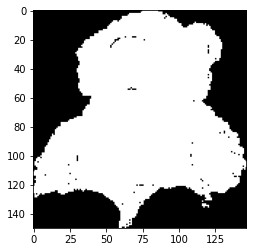

In [56]:
plt.imshow(img,cmap='gray')

## Aplicación de un filtro

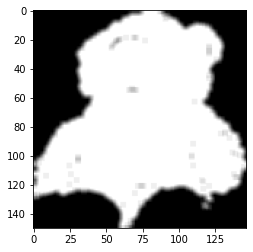

In [57]:
img_filtered = cv.blur(img,(4,4))
plt.imshow(img_filtered,cmap='gray')

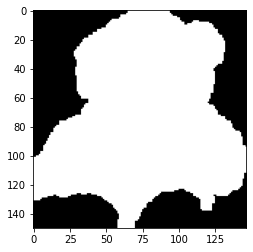

In [58]:
img_bin = img_filtered > 0
plt.imshow(img_bin * 255,cmap='gray')

## Usando operaciones morfológicas

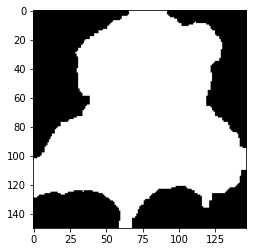

In [64]:
kernel = np.ones((5,5),np.uint8)
img_filtered = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

plt.imshow(img_filtered,cmap='gray')

In [60]:
img_filtered.dtype

dtype('uint8')

In [61]:
img_filtered.shape

(150, 147)

In [62]:
img.shape

(150, 147)